In [1]:
# MNIST demo
# Download MNIST using code from https://github.com/hsjeong5/MNIST-for-Numpy
import numpy as np
from urllib import request
import gzip
import pickle

filename = [
["training_images","train-images-idx3-ubyte.gz"],
["test_images","t10k-images-idx3-ubyte.gz"],
["training_labels","train-labels-idx1-ubyte.gz"],
["test_labels","t10k-labels-idx1-ubyte.gz"]
]

def download_mnist():
    base_url = "http://yann.lecun.com/exdb/mnist/"
    for name in filename:
        print("Downloading "+name[1]+"...")
        request.urlretrieve(base_url+name[1], name[1])
    print("Download complete.")

def save_mnist():
    mnist = {}
    for name in filename[:2]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1,28*28)
    for name in filename[-2:]:
        with gzip.open(name[1], 'rb') as f:
            mnist[name[0]] = np.frombuffer(f.read(), np.uint8, offset=8)
    with open("mnist.pkl", 'wb') as f:
        pickle.dump(mnist,f)
    print("Save complete.")

def init():
    download_mnist()
    save_mnist()

def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

init()
x_train, t_train, x_test, t_test = load()

Download complete.
Save complete.


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

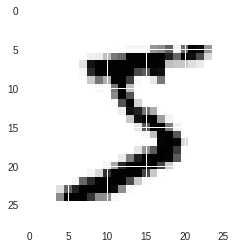

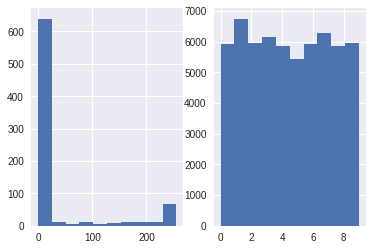

In [14]:
# Matplotlib is used for plotting.
import matplotlib.pyplot as plt
# Tells jupyter to show plots in browser.
%matplotlib inline 
plt.figure(1)
plt.imshow(x_train[0,:].reshape(28,28))
plt.figure(2)
plt.subplot(1,2,1)
plt.hist(x_train[0,:]) # Values in range 0-256, because pixels stored as uint8.
plt.subplot(1,2,2)
plt.hist(t_train.flatten()) # Targets in range 0-9. Need to convert to one-hot.

In [0]:
# Neural network from https://iamtrask.github.io/2015/07/12/basic-python-network/
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
for j in range(60000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    syn1 += l1.T.dot(l2_delta)
    syn0 += X.T.dot(l1_delta)